# Remote Work vs Travel Data

In [1]:
# Imports:
import pprint, json, csv, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests as rq
from pathlib import Path
import hvplot.pandas
# Add a config.py file and add a line that says 
# api_key = 'YOUR KEY HERE'
# replace "your key here" with your Geoapify api key
#from config import api_key


In [2]:
url = ''

# this does not work, trying sample code
# outp = rq.post(bls_url).json()

# pprint(outp)

In [3]:
data = path.join("Resources/LAPD_Crimes_Filtered_2022.csv")
crime_data = pd.read_csv(data, sep="\t")

In [4]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,220216262,9/8/22 0:00,9/8/22 0:00,1445,2,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765
1,221809626,4/23/22 0:00,4/22/22 0:00,2100,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696
2,221711121,7/10/22 0:00,7/10/22 0:00,200,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754
3,220805283,1/24/22 0:00,1/22/22 0:00,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439
4,221821212,11/27/22 0:00,11/27/22 0:00,1635,18,Southeast,1826,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475


In [5]:
crime_data["DATE OCC"]=pd.to_datetime(crime_data["DATE OCC"])

In [6]:
crime_data["Mocodes"]

0              1202 0913 0361 0416
1                              NaN
2         1206 1822 0416 0408 0400
3                        0344 0377
4              0337 0342 0344 1822
                    ...           
234306                   1822 0385
234307                         NaN
234308                         NaN
234309                   0385 1300
234310         0913 1814 0416 2000
Name: Mocodes, Length: 234311, dtype: object

In [7]:
cleaned = crime_data.loc[crime_data["LAT"]!=0,:]
cleaned.info()
crime_data = cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234310 entries, 0 to 234310
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           234310 non-null  int64         
 1   Date Rptd       234310 non-null  object        
 2   DATE OCC        234310 non-null  datetime64[ns]
 3   TIME OCC        234310 non-null  int64         
 4   AREA            234310 non-null  int64         
 5   AREA NAME       234310 non-null  object        
 6   Rpt Dist No     234310 non-null  int64         
 7   Part 1-2        234310 non-null  int64         
 8   Crm Cd          234310 non-null  int64         
 9   Crm Cd Desc     234310 non-null  object        
 10  Mocodes         202458 non-null  object        
 11  Vict Age        234310 non-null  int64         
 12  Vict Sex        204260 non-null  object        
 13  Vict Descent    204261 non-null  object        
 14  Premis Cd       234307 non-null  flo

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234310 entries, 0 to 234310
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           234310 non-null  int64         
 1   Date Rptd       234310 non-null  object        
 2   DATE OCC        234310 non-null  datetime64[ns]
 3   TIME OCC        234310 non-null  int64         
 4   AREA            234310 non-null  int64         
 5   AREA NAME       234310 non-null  object        
 6   Rpt Dist No     234310 non-null  int64         
 7   Part 1-2        234310 non-null  int64         
 8   Crm Cd          234310 non-null  int64         
 9   Crm Cd Desc     234310 non-null  object        
 10  Mocodes         202458 non-null  object        
 11  Vict Age        234310 non-null  int64         
 12  Vict Sex        204260 non-null  object        
 13  Vict Descent    204261 non-null  object        
 14  Premis Cd       234307 non-null  flo

In [9]:
homicide_codes=[210,220]
homicide_crimes = crime_data.loc[crime_data["Crm Cd"].isin(homicide_codes),:]
homicide_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
4,221821212,11/27/22 0:00,2022-11-27,1635,18,Southeast,1826,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475
26,220313656,7/13/22 0:00,2022-07-13,1300,3,Southwest,301,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,ADAMS BL,BURNSIDE AV,34.0325,-118.3602
55,222005154,1/28/22 0:00,2022-01-28,1245,20,Olympic,2049,1,210,ROBBERY,...,AO,Adult Other,210.0,NaN,NaN,NaN,800 S VERMONT AV,NaN,34.0578,-118.2916
57,220116582,7/21/22 0:00,2022-07-21,30,1,Central,166,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,400 E 7TH ST,NaN,34.0421,-118.2469
73,221512330,7/17/22 0:00,2022-07-17,552,15,N Hollywood,1599,1,210,ROBBERY,...,AA,Adult Arrest,210.0,998.0,NaN,NaN,7100 PACIFIC VIEW DR,NaN,34.1208,-118.3473


In [10]:
homicide_crimes["Crm Cd"].value_counts()

210    7950
220    1167
Name: Crm Cd, dtype: int64

In [11]:
homicide_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9117 entries, 4 to 234302
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           9117 non-null   int64         
 1   Date Rptd       9117 non-null   object        
 2   DATE OCC        9117 non-null   datetime64[ns]
 3   TIME OCC        9117 non-null   int64         
 4   AREA            9117 non-null   int64         
 5   AREA NAME       9117 non-null   object        
 6   Rpt Dist No     9117 non-null   int64         
 7   Part 1-2        9117 non-null   int64         
 8   Crm Cd          9117 non-null   int64         
 9   Crm Cd Desc     9117 non-null   object        
 10  Mocodes         9111 non-null   object        
 11  Vict Age        9117 non-null   int64         
 12  Vict Sex        9111 non-null   object        
 13  Vict Descent    9111 non-null   object        
 14  Premis Cd       9117 non-null   float64       
 15  Pr

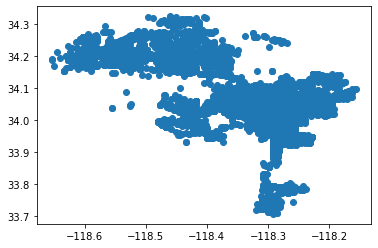

In [12]:
plt.scatter(homicide_crimes["LON"],homicide_crimes["LAT"])
plt.show()

In [13]:
homicide_crimes = homicide_crimes[homicide_crimes["Mocodes"].notna()]
gun_robberies = homicide_crimes.loc[homicide_crimes["Mocodes"].str.contains("0302"),:]
gun_robberies.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
26,220313656,7/13/22 0:00,2022-07-13,1300,3,Southwest,301,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,ADAMS BL,BURNSIDE AV,34.0325,-118.3602
356,221413685,7/12/22 0:00,2022-07-12,1525,14,Pacific,1474,1,220,ATTEMPTED ROBBERY,...,IC,Invest Cont,220.0,NaN,NaN,NaN,8300 LINCOLN BL,NaN,33.9627,-118.4217
373,221815520,8/9/22 0:00,2022-08-09,2020,18,Southeast,1802,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,MANCHESTER BL,HOOVER ST,33.9560,-118.2772
388,221706006,2/27/22 0:00,2022-02-27,100,17,Devonshire,1762,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,9700 DEERING AV,NaN,34.2449,-118.5950
627,221212293,5/23/22 0:00,2022-05-21,1030,12,77th Street,1256,1,210,ROBBERY,...,AA,Adult Arrest,210.0,NaN,NaN,NaN,7500 S BROADWAY,NaN,33.9727,-118.2850


In [14]:
gun_robberies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 26 to 234302
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           1510 non-null   int64         
 1   Date Rptd       1510 non-null   object        
 2   DATE OCC        1510 non-null   datetime64[ns]
 3   TIME OCC        1510 non-null   int64         
 4   AREA            1510 non-null   int64         
 5   AREA NAME       1510 non-null   object        
 6   Rpt Dist No     1510 non-null   int64         
 7   Part 1-2        1510 non-null   int64         
 8   Crm Cd          1510 non-null   int64         
 9   Crm Cd Desc     1510 non-null   object        
 10  Mocodes         1510 non-null   object        
 11  Vict Age        1510 non-null   int64         
 12  Vict Sex        1509 non-null   object        
 13  Vict Descent    1509 non-null   object        
 14  Premis Cd       1510 non-null   float64       
 15  P

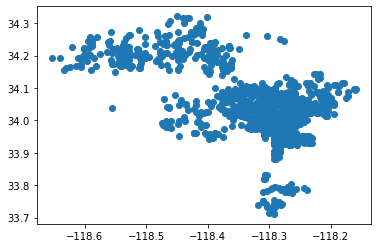

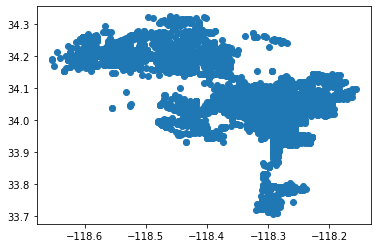

In [15]:
plt.scatter(gun_robberies["LON"],gun_robberies["LAT"])
plt.show()

plt.scatter(homicide_crimes["LON"],homicide_crimes["LAT"])
plt.show()

In [16]:
hom_loc = homicide_crimes.loc[:,["LAT","LON"]]
hom_loc

,LAT,LON
4,33.9543,-118.2475
26,34.0325,-118.3602
55,34.0578,-118.2916
57,34.0421,-118.2469
73,34.1208,-118.3473
...,...,...
234067,33.9925,-118.2608
234117,34.1547,-118.4530
234138,34.1938,-118.5622
234201,34.0463,-118.2550


In [19]:
map_plot1 = gun_robberies.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="EsriImagery",
                                    frame_width=700,
                                    frame_height=500,
                                    color="Crm Cd"
                                    )
map_plot1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (Crm Cd)

In [ ]:
crime_data.info()

In [ ]:
crime_status = crime_data["Status"]
crime_status.unique()
crime_status.value_counts()

In [ ]:
crime_status_desc = crime_data["Status Desc"]
crime_status_desc.value_counts()

In [ ]:
crime_data["Vict Sex"].value_counts()

In [ ]:
crime_data["Vict Age"].value_counts()

In [ ]:
crime_data["Vict Age"].mean()

In [ ]:
zero_age = crime_data.loc[crime_data["Vict Age"] == 0,:]
zero_age.head()

### Due to some reports containing a zero age, we have a few options to consider for the data.

- Because of the sizable amount, we can replace all 0 values to a random range within the mean (30) like 28-32.
- The option to outright discard the data is there, but losing 55955 data points along with crimes such as vehicular theft and burglary, it is a very big choice.
- We can always just leave it at 0 and determine why it was reported as age 0. Possibly because there were multiple victims in the scene.

In [ ]:
crime_type = crime_data["Crm Cd"]
crime_type.unique()

In [ ]:
crime_type.nunique()

In [ ]:
crime_type.value_counts()

In [ ]:
plt.figure(figsize=(20,20))
plt.bar(crime_type.unique(),crime_type.value_counts())

plt.show()

In [ ]:
locations_df = crime_data.loc[crime_data["LAT"]!=0,["LAT","LON"]]

In [ ]:
locations_df.head()

In [ ]:
zero_coords = locations_df.loc[locations_df["LON"] == 0,:]
zero_coords.head()

In [ ]:
locations_df["LAT"].()

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(locations_df["LON"],locations_df["LAT"])
plt.show()

In [ ]:
crime_data["Date Rptd"]

In [ ]:
date = pd.to_datetime(crime_data["Date Rptd"])
date.info()

In [ ]:
crime_data.info()

In [ ]:
pd.to_datetime(crime_data["DATE OCC"])
#time = pd.to_datetime(crime_data["TIME OCC"],format='%H:%M')

In [ ]:
date.head()

In [ ]:
time.head()

In [ ]:
newtime=pd.to_datetime(crime_data["TIME OCC"], format='%H%M').dt.time

In [ ]:
crime_data["TIME OCC"].value_counts()